In [1]:
from __future__ import absolute_import, division, print_function
import tensorflow as tf
import numpy as np
rng = np.random

In [3]:
# Parameters.
learning_rate = 0.01
training_steps = 1000
display_step = 50

# Training Data.
X = np.array([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
              7.042,10.791,5.313,7.997,5.654,9.27,3.1])
Y = np.array([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
              2.827,3.465,1.65,2.904,2.42,2.94,1.3])

In [4]:
# Weight and Bias, initialized randomly.
# Return a sample (or samples) from the “standard normal” distribution.
W = tf.Variable(rng.randn(), name="weight")
b = tf.Variable(rng.randn(), name="bias")

In [6]:
b

<tf.Variable 'bias:0' shape=() dtype=float32, numpy=-0.51843107>

In [7]:
# Linear regression (Wx + b).
def linear_regression(x):
    return W * x + b

# Mean square error.
def mean_square(y_pred, y_true):
    return tf.reduce_mean(tf.square(y_pred - y_true))

# Stochastic Gradient Descent Optimizer.
# Gradient descent (with momentum) optimizer.
# Update rule for parameter w with gradient g when momentum is 0:
# w = w - learning_rate * g
optimizer = tf.optimizers.SGD(learning_rate)

In [8]:
# Optimization process. 
def run_optimization():
    # Wrap computation inside a GradientTape for automatic differentiation.
    # https://www.tensorflow.org/api_docs/python/tf/GradientTape
    # https://zhuanlan.zhihu.com/p/102207302 for GradientTape based diff and batch jacobian matrix
    with tf.GradientTape() as g:
        pred = linear_regression(X)
        loss = mean_square(pred, Y)

    # Compute gradients.
    # Computes the gradient using operations recorded in context of this tape.
    # target: a list or nested structure of Tensors or Variables to be differentiated.
    # source: a list or nested structure of Tensors or Variables. 
    #         target will be differentiated against elements in sources.
    gradients = g.gradient(loss, [W, b])
    
    # Update W and b following gradients.
    # Ask the optimizer to apply the processed gradients.
    # https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Optimizer
    optimizer.apply_gradients(zip(gradients, [W, b]))

In [9]:
# Run training for the given number of steps.
for step in range(1, training_steps + 1):
    # Run the optimization to update W and b values.
    run_optimization()
    
    if step % display_step == 0:
        pred = linear_regression(X)
        loss = mean_square(pred, Y)
        print("step: %i, loss: %f, W: %f, b: %f" % (step, loss, W.numpy(), b.numpy()))

step: 50, loss: 0.335163, W: 0.422333, b: -0.411374
step: 100, loss: 0.296041, W: 0.402799, b: -0.272887
step: 150, loss: 0.265362, W: 0.385501, b: -0.150247
step: 200, loss: 0.241302, W: 0.370182, b: -0.041642
step: 250, loss: 0.222433, W: 0.356616, b: 0.054535
step: 300, loss: 0.207636, W: 0.344602, b: 0.139706
step: 350, loss: 0.196032, W: 0.333963, b: 0.215130
step: 400, loss: 0.186932, W: 0.324542, b: 0.281923
step: 450, loss: 0.179795, W: 0.316199, b: 0.341072
step: 500, loss: 0.174199, W: 0.308810, b: 0.393453
step: 550, loss: 0.169809, W: 0.302267, b: 0.439840
step: 600, loss: 0.166367, W: 0.296473, b: 0.480918
step: 650, loss: 0.163668, W: 0.291342, b: 0.517295
step: 700, loss: 0.161551, W: 0.286798, b: 0.549510
step: 750, loss: 0.159891, W: 0.282774, b: 0.578037
step: 800, loss: 0.158589, W: 0.279211, b: 0.603301
step: 850, loss: 0.157568, W: 0.276055, b: 0.625673
step: 900, loss: 0.156768, W: 0.273261, b: 0.645485
step: 950, loss: 0.156140, W: 0.270786, b: 0.663030
step: 100

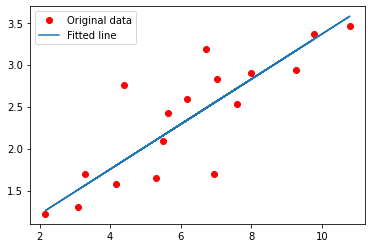

In [10]:
import matplotlib.pyplot as plt
# Graphic display
plt.plot(X, Y, 'ro', label='Original data')
plt.plot(X, np.array(W * X + b), label='Fitted line')
plt.legend()
plt.show()

In [11]:
np.array(W * X + b)

array([1.5649283, 1.860382 , 2.1558356, 2.4808347, 2.5399253, 1.7980682,
       3.3051505, 2.339017 , 2.7171977, 1.2606109, 2.5700078, 3.576968 ,
       2.1056085, 2.8265157, 2.197199 , 3.168436 , 1.5112094],
      dtype=float32)